**Буду использовать GPU ускорение.**

In [1]:
import cv2
import numpy as np
import cupy as cp
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

use_graph = True

###### 1. С помощью библиотеки OpenCV считайте изображение:

In [2]:
image = cp.array(cv2.imread("data/russia-1927758_1280.jpg"), dtype=cp.uint8)

print(image.shape)

(856, 1280, 3)


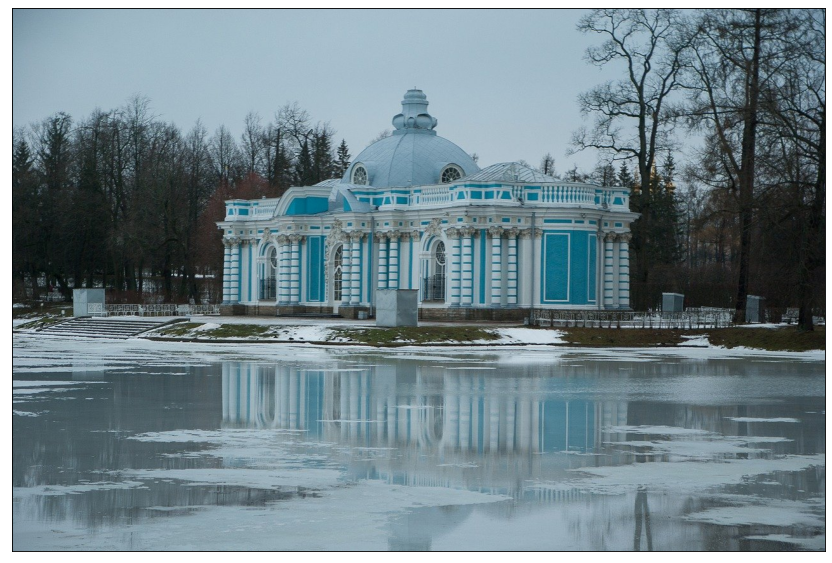

In [3]:
# Изобразить его можно с помощью matplotlib
if use_graph:
    figure(figsize=(16, 9), dpi=80)
    plt.imshow(cv2.cvtColor(image.get(), cv2.COLOR_BGR2RGB))
    plt.xticks([]),plt.yticks([])
    plt.show()

###### 2. Определите параметры изображения.

In [4]:
print(f"Ширина изображения в пикселях : {image.shape[1]}")
print(f"Высота изображения в пикселях : {image.shape[0]}")
print(f"Среднее значение интенсивности пикселя изображения : {cp.mean(image)}")

Ширина изображения в пикселях : 1280
Высота изображения в пикселях : 856
Среднее значение интенсивности пикселя изображения : 121.34244974201714


Выполню преобразование яркостей каждого канала из целочисленного диспазона от 0 до 255 во float32 диапазон от 0 до 1. 

Также OpenCV умеет работать только с float32, но не float64, float128 и так далее.

In [5]:
image_float = (image / 255.0).astype(cp.float32)

###### 3. Выполните преобразование экспозиции.

Среднее значение интенсивности пикселя преобразованного изображения при p = -0.3 : 98.56171966267523


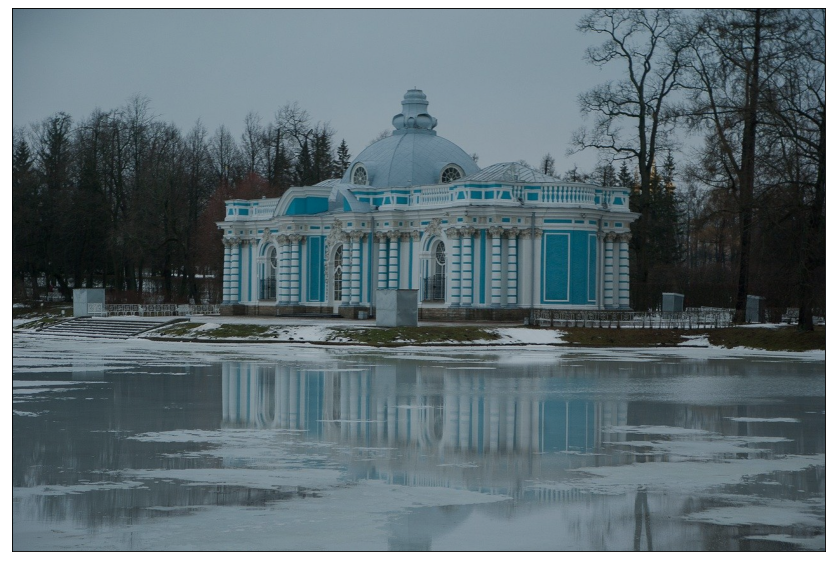

Среднее значение интенсивности пикселя преобразованного изображения при p = 0.6 : 176.85842247128116


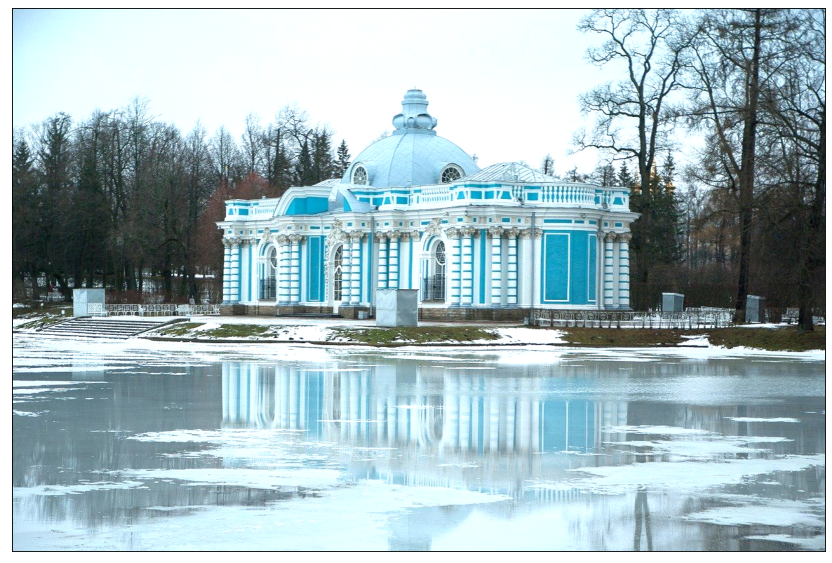

In [6]:
for p in [-0.3, 0.6]:
    image_exposed = image_float * cp.power(2.0, p).astype(cp.float32)
    image_exposed = np.clip(image_exposed, 0.0, 1.0)
    image_exposed = cp.round(image_exposed * 255).astype(cp.uint8)
    if use_graph:
        figure(figsize=(16, 9), dpi=80)
        plt.imshow(cv2.cvtColor(image_exposed.get(), cv2.COLOR_BGR2RGB))
        plt.xticks([]),plt.yticks([])
        plt.show()
    print(f"Среднее значение интенсивности пикселя преобразованного изображения при p = {p} : {cp.mean(image_exposed)}")

###### 4. Выполните преобразование контрастности.

Среднее значение интенсивности пикселя преобразованного изображения при p = -0.3 : 26.956039780471183


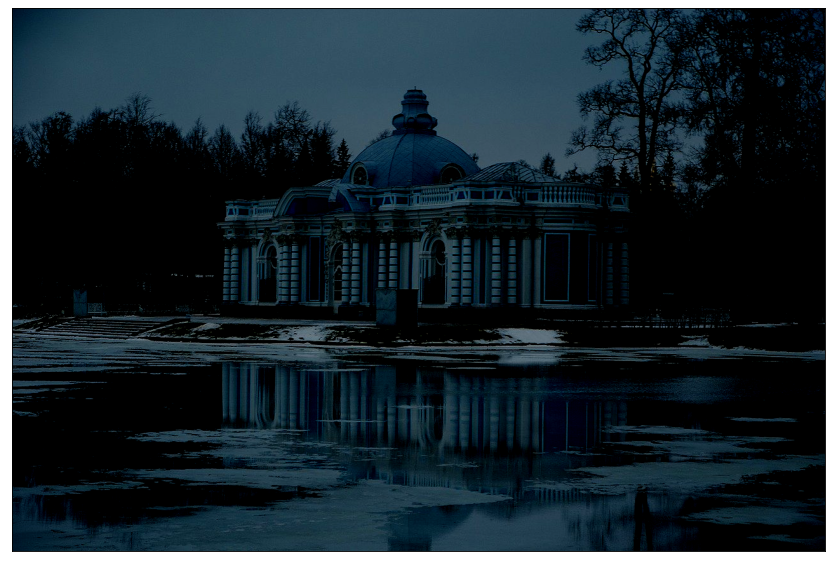

Среднее значение интенсивности пикселя преобразованного изображения при p = 0.6 : 51.82651291131231


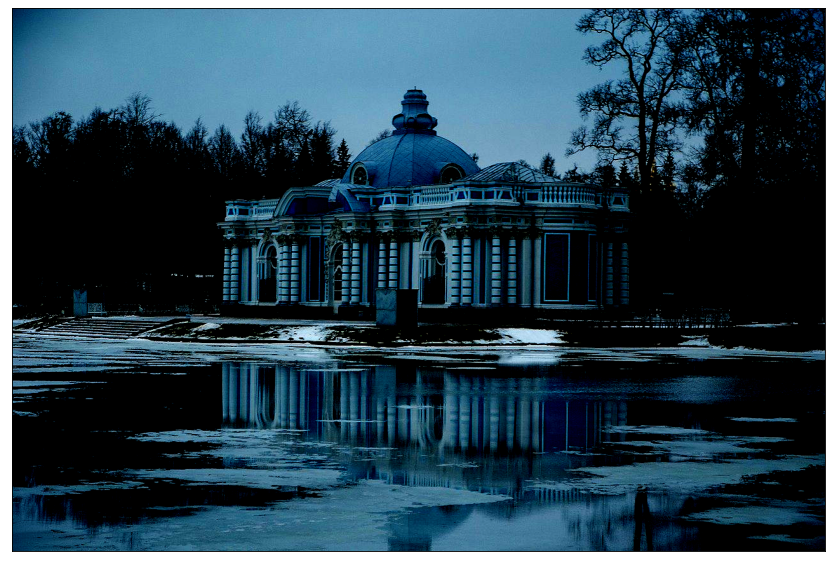

In [7]:
for p in [-0.3, 0.6]:
    if p > 0.0:
        image_contrasted = ((image_float - 0.5) / (1 - p)).astype(cp.float32)
    else:
        image_contrasted = ((image_float - 0.5) * (1 - p)).astype(cp.float32)
    image_contrasted = np.clip(image_contrasted, 0.0, 1.0)
    image_contrasted = cp.round(image_contrasted * 255).astype(cp.uint8)
    if use_graph:
        figure(figsize=(16, 9), dpi=80)
        plt.imshow(cv2.cvtColor(image_contrasted.get(), cv2.COLOR_BGR2RGB))
        plt.xticks([]),plt.yticks([])
        plt.show()
    print(f"Среднее значение интенсивности пикселя преобразованного изображения при p = {p} : {cp.mean(image_contrasted)}")